# Value Iteration on Grid World

In [11]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
from gridworld import GridWorld,plot_value,plot_policy

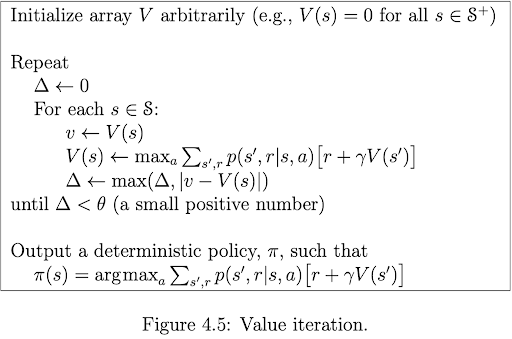

In [12]:
def policy_improvement(V,Pi,env):
    """
    Update the policy given a state-value functions
    when multiple actions result in the same action_value, the p will be divided equally
    """
    
    policy_stable = True
    Pi_new = {}
    
    #for all non-terminal states
    for state in env.states:
        if state in env.end_state:
            continue
        #old action
        action = Pi[tuple(state)]
        
        #find new optimal action under current state-value function
        action_values = []
        
        #take all actions and find the largest value
        for a in range(env.action_space.n):
            env.reset(state.copy())
            next_state, reward, done, info = env.step(a)
            next_state_value = V[tuple(next_state)]
            action_values.append(reward+next_state_value)
        best_actions = np.argwhere(action_values == np.amax(action_values)).flatten()

        
        #update policy
        prob = 1/len(best_actions)
        Pi_new[tuple(state)] = [prob if i in best_actions else 0 for i in range(env.action_space.n)]
        
        if not np.array_equal(action,Pi_new[tuple(state)]):
            policy_stable = False

    return policy_stable, Pi_new

def get_max_expected_value(state,Pi,V):
    '''
    determine which action yields the highest expected value and return the value
    '''
    #pi(s)
    action_prob = Pi[tuple(state)]
    
    
    
    max_value = float('-inf')
    for action in range(len(action_prob)):
        
        env.reset(state.copy())
        next_state, reward, done, info = env.step(action)
        max_value = max(max_value,reward + V[tuple(next_state)])

    return round(max_value,1)

def value_iteration(V,Pi,env,theta = 0.1):

    while True:
        delta = 0
        for state in env.states:
            if state in env.end_state:
                continue
            old_value = V[tuple(state)]
            V[tuple(state)] = get_max_expected_value(state,Pi,V)
            delta = max(delta,abs(old_value-V[tuple(state)]))
        
        if delta < theta:
            break
    
    return V

In [13]:
size = 4
V = dict.fromkeys([(i,j) for i in range(size) for j in range(size)], 0) # values as 0
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*size)# inital actions as UP
env = GridWorld(size)

In [14]:
plot_value(V,size)
print('------------------------------')
plot_policy(Pi,size)

0	|0	|0	|0	|
0	|0	|0	|0	|
0	|0	|0	|0	|
0	|0	|0	|0	|
------------------------------
X	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|X	|
 


In [19]:
V_final = value_iteration(V,Pi,env)
policy_stable, Pi_final = policy_improvement(V_final,Pi,env)

plot_value(V_final,size)
print('------------------------------')
plot_policy(Pi_final,size)

0	|0	|-1	|-2	|
0	|-1	|-2	|-1	|
-1	|-2	|-1	|0	|
-2	|-1	|0	|0	|
------------------------------
X	|←	|←	|←↓	|
↑	|↑←	|↑←↓→	|↓	|
↑	|↑←↓→	|↓→	|↓	|
↑→	|→	|→	|X	|
 
